In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("df_test.csv")
print(df.head())
print(df.columns)

df["date"] = pd.to_datetime(df["date"])
df["date"] = df["date"].apply(lambda x: x.toordinal())

df = df.astype("double")
df["amenity_score"] = df["bedrooms"] + df["real_bathrooms"] + df["has_basement"] + df["has_lavatory"] + df["nice_view"] + df["renovated"]

print(df.head())

n = 5380

df_train = df.iloc[:n]
df_test = df.iloc[n:]

         date     price  bedrooms  grade  has_basement  living_in_m2  \
0  2014-09-26  305000.0         2      1         False      76.18046   
1  2014-05-14  498000.0         3      2          True     210.88981   
2  2015-03-23  590000.0         2      4         False     262.91549   
3  2014-07-15  775000.0         3      3         False     159.79316   
4  2015-04-14  350000.0         2      1         False      92.90300   

   renovated  nice_view  perfect_condition  real_bathrooms  has_lavatory  \
0      False      False               True               1         False   
1      False      False              False               2          True   
2      False      False              False               2          True   
3      False      False              False               1          True   
4      False      False              False               1          True   

   single_floor  month  quartile_zone  
0          True      9              2  
1          True      5        

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.372
Model:                            OLS   Adj. R-squared:                  0.372
Method:                 Least Squares   F-statistic:                     3187.
Date:                Tue, 12 Nov 2024   Prob (F-statistic):               0.00
Time:                        20:00:56   Log-Likelihood:                -72274.
No. Observations:                5380   AIC:                         1.446e+05
Df Residuals:                    5378   BIC:                         1.446e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept      1.36e+05   6396.220     21.270   

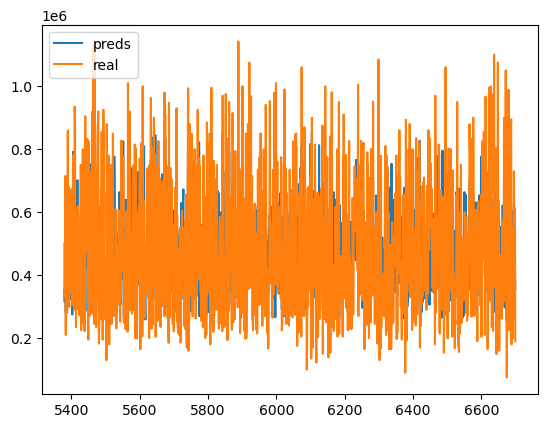

In [3]:
model = smf.ols("price ~ living_in_m2", df_train)
result = model.fit()
print(result.summary())

preds = result.predict(df_test)
print(preds)

plt.plot(preds, label = "preds")
plt.plot(df_test["price"], label = "real")
plt.legend()
plt.show()

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.740
Method:                 Least Squares   F-statistic:                     1180.
Date:                Tue, 12 Nov 2024   Prob (F-statistic):               0.00
Time:                        20:00:56   Log-Likelihood:                -69894.
No. Observations:                5380   AIC:                         1.398e+05
Df Residuals:                    5366   BIC:                         1.399e+05
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept         -5.686e+07      1e+0

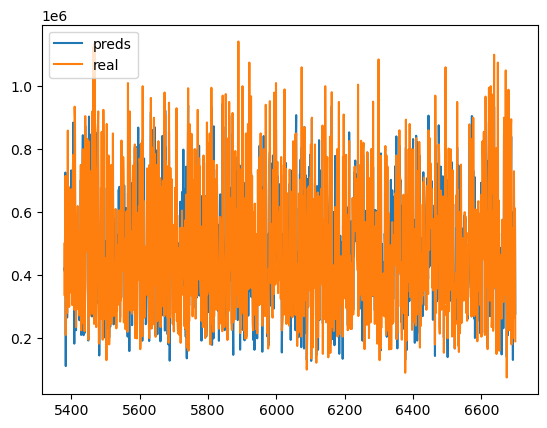

In [4]:
model_mv = smf.ols("price ~ date + bedrooms + grade + has_basement + living_in_m2 + renovated + nice_view + perfect_condition + real_bathrooms + has_lavatory + single_floor + month + quartile_zone", df_train)
result_mv = model_mv.fit()
print(result_mv.summary())

preds = result_mv.predict(df_test)
print(preds)

plt.plot(preds, label = "preds")
plt.plot(df_test["price"], label = "real")
plt.legend()
plt.show()

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.715
Model:                            OLS   Adj. R-squared:                  0.714
Method:                 Least Squares   F-statistic:                     1682.
Date:                Tue, 12 Nov 2024   Prob (F-statistic):               0.00
Time:                        20:02:41   Log-Likelihood:                -70152.
No. Observations:                5380   AIC:                         1.403e+05
Df Residuals:                    5371   BIC:                         1.404e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept         -6.303e+07   1.05e+0

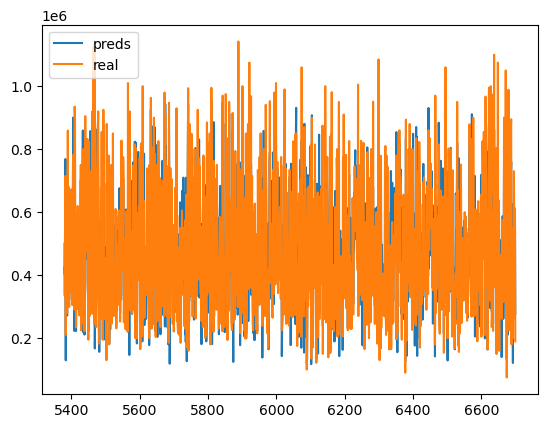

In [6]:
model_mv2 = smf.ols("price ~ amenity_score + date + grade + living_in_m2 + perfect_condition + single_floor + month + quartile_zone", df_train)
result_mv2 = model_mv2.fit()
print(result_mv2.summary())

preds = result_mv2.predict(df_test)
print(preds)

plt.plot(preds, label = "preds")
plt.plot(df_test["price"], label = "real")
plt.legend()
plt.show()